In [2]:
import tensorflow as tf
import numpy as np

 Remember IOU is Intersection over Union, where the Intersection set is an AND operation (pixels that are truly part of a class AND are classified as part of the class by the network) and the Union is an OR operation (pixels that are truly part of that class + pixels that are classified as part of that class by the network).

### TensorFlow IoU

look at the tf.metrics.mean_iou function. Like all the other [TensorFlow metric functions](https://www.tensorflow.org/api_docs/python/tf/metrics), it returns a Tensor for the metric result and a Tensor Operation to generate the result. In this case it returns mean_iou for the result and update_op for the update operation. Make sure to run update_op before getting the result from mean_iou.

In [3]:
def mean_iou(ground_truth,prediction,num_classes):
    mean_iou,update_op=tf.metrics.mean_iou(ground_truth,prediction,num_classes)
    return mean_iou,update_op

In [4]:
ground_trouth=tf.constant([[0,0,0,0],
                           [1,1,1,1],
                           [2,2,2,2],
                           [3,3,3,3]],dtype=tf.float32)
prediction=tf.constant([[0,0,0,0],
                        [1,0,0,1],
                        [1,2,2,1],
                        [3,3,0,3]],dtype=tf.float32)


In [5]:
mean_iou,update_op=mean_iou(ground_trouth,prediction,4)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


The other characteristic of TensorFlow metric functions is the usage of [local TensorFlow variables](https://www.tensorflow.org/api_docs/python/tf/local_variables). These are temporary TensorFlow Variables that must be initialized by running tf.local_variables_initializer(). This is similar to tf.global_variables_initializer(), but for different TensorFlow Variables.

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    
    print("Mean IoU =", sess.run(update_op))
    print("Mean IoU =", sess.run(mean_iou))

Mean IoU = [[4. 0. 0. 0.]
 [2. 2. 0. 0.]
 [0. 2. 2. 0.]
 [1. 0. 0. 3.]]
Mean IoU = 0.53869045



Steps

    count true positives (TP)
    count false positives (FP)

    count false negatives (TN)

    Intersection = TP
    Union = TP + FP + FN
    IOU = Intersection/Union




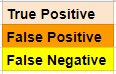

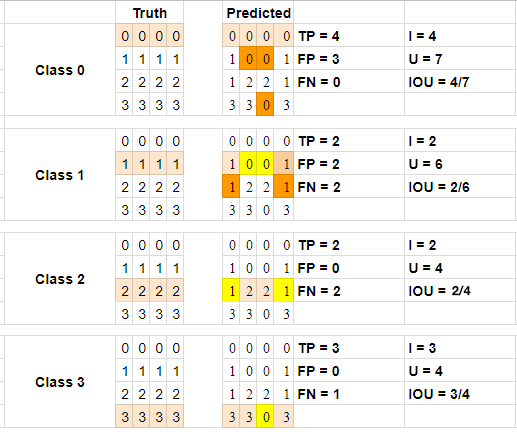

Mean IOU = [ (4/7) + (2/6) + (2/4) + (3/4)]/4 = 0.539
